In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import os
os.chdi

In [ ]:

import re
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import collections
#import difflib
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")

In [ ]:

toxic_data = pd.read_csv('data/train.csv')
print("Shape of data : ", toxic_data.shape)
toxic_data.head()

Shape of data :  (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
stop_words = set(stopwords.words('english'))
# function to preprocess and remove stopwords
def preprocess(text):
  no_stops = []
  sent = text.lower()
  sent = re.sub(r"[^a-zA-Z]"," ",sent)    # removes all characters except alphabets
  sent = re.sub(r'\s+', ' ', sent)       # removes extra white spaces
  #sent = str(text)
  for w in sent.split():
    if not w in stop_words:
      no_stops.append(w)
  long_words = [word for word in no_stops if len(word)>3]
  return (" ".join(long_words))

In [ ]:
data = toxic_data.copy()
data['cleaned_comments'] = data['comment_text'].apply(lambda x: preprocess(str(x)))
#lemmatizer = WordNetLemmatizer()
#data['cleaned_comments'] = data['cleaned_comments'].apply(lambda x: lemmatizer.lemmatize(word) for word in x.split(' '))

In [ ]:
data.cleaned_comments[:10]

0    explanation edits made username hardcore metal...
1    matches background colour seemingly stuck than...
2    really trying edit constantly removing relevan...
3    make real suggestions improvement wondered sec...
4                            hero chance remember page
5                 congratulations well tools well talk
6                          cocksucker piss around work
7    vandalism matt shirvington article reverted pl...
8    sorry word nonsense offensive anyway intending...
9                 alignment subject contrary dulithgow
Name: cleaned_comments, dtype: object

In [ ]:
len(sentences)

700887

In [ ]:
data['cleaned_comments'] = data['cleaned_comments'].apply(lambda x:[word for word in x.split(' ')])
data.cleaned_comments[:19]

0     [explanation, edits, made, username, hardcore,...
1     [matches, background, colour, seemingly, stuck...
2     [really, trying, edit, constantly, removing, r...
3     [make, real, suggestions, improvement, wondere...
4                        [hero, chance, remember, page]
5            [congratulations, well, tools, well, talk]
6                      [cocksucker, piss, around, work]
7     [vandalism, matt, shirvington, article, revert...
8     [sorry, word, nonsense, offensive, anyway, int...
9             [alignment, subject, contrary, dulithgow]
10    [fair, rationale, image, wonju, thanks, upload...
11                        [lets, discuss, maybe, phone]
12    [talk, exclusive, group, talibans, good, destr...
13    [start, throwing, accusations, warnings, lets,...
14    [girl, started, arguments, stuck, nose, belong...
15    [juelz, santanas, juelz, santana, years, came,...
16           [look, come, think, comming, back, tosser]
17    [redirect, talk, voydan, georgiev, chernod

In [ ]:
## This is multilabel data i.e each comment can have one or more label ot none at all. There are five label/category
## of toxic comments. i will create data for each category.

severe_toxics = data.loc[data['severe_toxic']==1]
toxic = data.loc[data['toxic']==1]
obscene = data.loc[data['obscene']==1]
insult = data.loc[data['insult']==1]
identity_hate = data.loc[data['identity_hate']==1]

In [ ]:
severe_toxics.cleaned_comments

6                          [cocksucker, piss, around, work]
55        [stupid, peace, shit, stop, deleting, stuff, a...
181                    [stupid, fuck, mother, cunt, stinks]
442                                        [fucking, bitch]
579       [motherfucking, piece, crap, fuckheads, blocking]
                                ...                        
159096    [filthy, stinking, crow, back, dirty, crow, be...
159099    [fucking, pathetic, moron, jimbo, wales, rootm...
159281              [never, know, good, feels, fuck, woman]
159312    [walter, mercado, antonio, quite, frankly, fuc...
159400    [shalom, semite, fuck, kill, bitch, leave, wik...
Name: cleaned_comments, Length: 1595, dtype: object

In [ ]:
## make a list of all tokens in severe_toxic label.
all_severe_toxic_tokens = [token for token_sublist in list(severe_toxics.cleaned_comments) for token in token_sublist ]

In [ ]:
len(all_severe_toxic_tokens)

64458

In [ ]:
# find frequency distribution of each tokens.
freq_dist = nltk.FreqDist(all_severe_toxic_tokens)          # frequency of each tokens
freq_dist.most_common(100)

[('fuck', 7304),
 ('suck', 2535),
 ('shit', 1885),
 ('faggot', 1571),
 ('fucking', 1456),
 ('bitch', 1113),
 ('nigger', 1012),
 ('sucks', 961),
 ('cunt', 834),
 ('wikipedia', 774),
 ('cock', 681),
 ('fucksex', 624),
 ('yourselfgo', 621),
 ('dick', 596),
 ('fucker', 588),
 ('kill', 580),
 ('asshole', 522),
 ('cocksucker', 510),
 ('piece', 502),
 ('penis', 490),
 ('mothjer', 489),
 ('bastard', 481),
 ('bitches', 430),
 ('huge', 424),
 ('shut', 407),
 ('damn', 398),
 ('rape', 383),
 ('stupid', 369),
 ('offfuck', 360),
 ('mexicans', 358),
 ('anal', 350),
 ('hanibal', 348),
 ('assad', 347),
 ('like', 341),
 ('niggas', 337),
 ('dickhead', 337),
 ('pussy', 332),
 ('idiot', 320),
 ('block', 318),
 ('bush', 294),
 ('wiki', 286),
 ('criminalwar', 279),
 ('bunksteve', 278),
 ('going', 273),
 ('cocksucking', 272),
 ('small', 264),
 ('chester', 261),
 ('marcolfuck', 260),
 ('want', 259),
 ('mother', 241),
 ('cocks', 233),
 ('fack', 232),
 ('useless', 231),
 ('homeland', 229),
 ('notrhbysouthbanof',

In [ ]:
### Label/Category : toxic
all_toxic_tokens = [token for token_sublist in list(toxic.cleaned_comments) for token in token_sublist ]
print("Total no. of tokens: ",len(all_toxic_tokens))
freq_dist = nltk.FreqDist(all_toxic_tokens)          # frequency of each tokens
freq_dist.most_common(100)

Total no. of tokens:  365122


[('fuck', 9939),
 ('wikipedia', 3686),
 ('shit', 3624),
 ('like', 3512),
 ('nigger', 3300),
 ('fucking', 3289),
 ('suck', 3235),
 ('hate', 2631),
 ('know', 2201),
 ('page', 2150),
 ('faggot', 2017),
 ('people', 1874),
 ('moron', 1862),
 ('bitch', 1787),
 ('cunt', 1544),
 ('talk', 1499),
 ('sucks', 1443),
 ('stupid', 1439),
 ('wiki', 1438),
 ('stop', 1420),
 ('article', 1395),
 ('user', 1361),
 ('dick', 1304),
 ('penis', 1239),
 ('think', 1236),
 ('want', 1220),
 ('bullshit', 1139),
 ('life', 1093),
 ('block', 1089),
 ('time', 1064),
 ('asshole', 1044),
 ('wanker', 1035),
 ('right', 1032),
 ('dont', 1031),
 ('would', 1021),
 ('even', 1007),
 ('bark', 1001),
 ('balls', 1000),
 ('make', 952),
 ('vandalism', 951),
 ('idiot', 951),
 ('going', 947),
 ('cock', 940),
 ('edit', 937),
 ('please', 920),
 ('little', 851),
 ('piece', 844),
 ('nipple', 825),
 ('really', 816),
 ('kill', 796),
 ('good', 793),
 ('hell', 790),
 ('aids', 784),
 ('dickhead', 765),
 ('bastard', 754),
 ('fucker', 742),
 ('a

In [ ]:
## Label/Category: obscene
all_obscene_tokens = [token for token_sublist in list(obscene.cleaned_comments) for token in token_sublist ]
print("Total no. of tokens: ",len(all_obscene_tokens))
freq_dist = nltk.FreqDist(all_obscene_tokens)          # frequency of each tokens
freq_dist.most_common(100)

Total no. of tokens:  202371


[('fuck', 9864),
 ('shit', 3214),
 ('fucking', 3192),
 ('suck', 3021),
 ('nigger', 2727),
 ('wikipedia', 1911),
 ('bitch', 1797),
 ('like', 1541),
 ('cunt', 1533),
 ('dick', 1258),
 ('faggot', 1223),
 ('know', 1178),
 ('bullshit', 1086),
 ('page', 1084),
 ('penis', 1076),
 ('sucks', 1068),
 ('asshole', 1009),
 ('stupid', 953),
 ('cock', 924),
 ('hate', 835),
 ('people', 825),
 ('nipple', 824),
 ('user', 782),
 ('talk', 777),
 ('fucker', 726),
 ('dickhead', 712),
 ('article', 690),
 ('bastard', 690),
 ('piece', 682),
 ('faggots', 670),
 ('right', 654),
 ('block', 654),
 ('stop', 645),
 ('want', 641),
 ('idiot', 633),
 ('fucksex', 624),
 ('life', 622),
 ('yourselfgo', 621),
 ('think', 617),
 ('wiki', 617),
 ('freedom', 602),
 ('damn', 600),
 ('shut', 590),
 ('twat', 577),
 ('going', 575),
 ('edit', 549),
 ('cocksucker', 547),
 ('huge', 541),
 ('time', 523),
 ('little', 502),
 ('buttsecks', 497),
 ('would', 495),
 ('mothjer', 489),
 ('mother', 475),
 ('bitches', 475),
 ('make', 471),
 ('e

In [ ]:
## Label/Category: insult
all_insult_tokens = [token for token_sublist in list(insult.cleaned_comments) for token in token_sublist ]
print("Total no. of tokens: ",len(all_insult_tokens))
freq_dist = nltk.FreqDist(all_insult_tokens)          # frequency of each tokens
freq_dist.most_common(100)

Total no. of tokens:  179359


[('fuck', 7929),
 ('fucking', 2799),
 ('suck', 2792),
 ('nigger', 2781),
 ('faggot', 1867),
 ('bitch', 1735),
 ('shit', 1691),
 ('like', 1565),
 ('moron', 1458),
 ('cunt', 1443),
 ('wikipedia', 1433),
 ('hate', 1386),
 ('know', 1162),
 ('stupid', 1068),
 ('dick', 1046),
 ('asshole', 957),
 ('sucks', 954),
 ('page', 923),
 ('people', 825),
 ('idiot', 811),
 ('piece', 712),
 ('dickhead', 709),
 ('fucker', 699),
 ('want', 697),
 ('cock', 689),
 ('life', 679),
 ('faggots', 665),
 ('bastard', 640),
 ('stop', 635),
 ('yourselfgo', 621),
 ('block', 605),
 ('freedom', 605),
 ('user', 596),
 ('think', 580),
 ('twat', 576),
 ('cocksucker', 543),
 ('huge', 532),
 ('article', 530),
 ('damn', 526),
 ('right', 521),
 ('little', 515),
 ('talk', 491),
 ('mothjer', 489),
 ('time', 480),
 ('bitches', 468),
 ('wiki', 459),
 ('admin', 452),
 ('hell', 449),
 ('bastered', 449),
 ('would', 447),
 ('penis', 441),
 ('mother', 440),
 ('make', 430),
 ('edit', 414),
 ('pussy', 404),
 ('even', 404),
 ('edits', 374

In [ ]:
## Label/Category: identity_hate
all_identityhate_tokens = [token for token_sublist in list(identity_hate.cleaned_comments) for token in token_sublist ]
print("Total no. of tokens: ",len(all_identityhate_tokens))
freq_dist = nltk.FreqDist(all_identityhate_tokens)          # frequency of each tokens
freq_dist.most_common(100)

Total no. of tokens:  35922


[('nigger', 2969),
 ('fuck', 880),
 ('faggot', 742),
 ('fucking', 518),
 ('huge', 430),
 ('suck', 427),
 ('shit', 410),
 ('stupid', 396),
 ('cunt', 394),
 ('like', 384),
 ('mexicans', 365),
 ('bitch', 349),
 ('niggas', 342),
 ('hate', 291),
 ('bunksteve', 278),
 ('jewish', 248),
 ('wikipedia', 234),
 ('tommy', 230),
 ('ancestryfuck', 208),
 ('kill', 197),
 ('jews', 184),
 ('spanish', 182),
 ('people', 181),
 ('licker', 181),
 ('centraliststupid', 179),
 ('piece', 171),
 ('nigga', 170),
 ('keep', 167),
 ('drink', 151),
 ('bleachanhero', 148),
 ('user', 135),
 ('dick', 128),
 ('homo', 125),
 ('page', 124),
 ('niggers', 119),
 ('know', 118),
 ('real', 114),
 ('wiki', 110),
 ('make', 105),
 ('think', 105),
 ('stop', 102),
 ('right', 100),
 ('would', 99),
 ('little', 98),
 ('life', 95),
 ('want', 94),
 ('cody', 93),
 ('edie', 90),
 ('mitt', 89),
 ('romney', 89),
 ('racist', 87),
 ('american', 86),
 ('cline', 86),
 ('love', 83),
 ('dont', 82),
 ('white', 81),
 ('minorities', 81),
 ('chink', 

**Now concate all datas above of all toxic categories into single dataframe**

In [ ]:
toxic_df = pd.concat([toxic,severe_toxics,insult,obscene,identity_hate])
print('Initial shape: ',toxic_df.shape)
toxic_df.drop_duplicates(subset='comment_text', inplace=True)  # drop duplicate data
print('Shape after droping duplicates : ',toxic_df.shape)

Initial shape:  (34620, 9)
Shape after droping duplicates :  (16203, 9)


In [ ]:
## We are going to create the list of sentences from above data 

sentences = toxic_df['comment_text'].apply(lambda x:[sent_tokenize(x)])

#flattening the list of list into single list.
sentences = [sent for sublist in sentences for sent in sublist]
sentences = [sent for sublist in sentences for sent in sublist]

# removing new line characters from sentences
sentences = [re.sub(r"\n"," ",sent) for sent in sentences]
sentences = [re.sub(r'\s+', ' ', sent) for sent in sentences ]
sentences = [sent.lower() for sent in sentences]

In [ ]:
len(sentences)  # number of sentences 

70226

In [ ]:
all_tokens = [token for token_sublist in list(toxic_df.cleaned_comments) for token in token_sublist ]
len(all_tokens)

396712

In [ ]:
#from pattern.text.en import singularize
#all_tokens = [singularize(token) for token in all_tokens]

In [ ]:
freq_dist = nltk.FreqDist(all_tokens)
freq_dist.most_common(100)

[('fuck', 10004),
 ('wikipedia', 3935),
 ('like', 3805),
 ('shit', 3695),
 ('fucking', 3337),
 ('nigger', 3306),
 ('suck', 3249),
 ('hate', 2655),
 ('page', 2382),
 ('know', 2363),
 ('people', 2069),
 ('faggot', 2028),
 ('moron', 1886),
 ('bitch', 1841),
 ('talk', 1646),
 ('cunt', 1574),
 ('article', 1574),
 ('user', 1526),
 ('stop', 1511),
 ('stupid', 1491),
 ('wiki', 1481),
 ('sucks', 1447),
 ('think', 1397),
 ('dick', 1337),
 ('want', 1304),
 ('penis', 1245),
 ('time', 1185),
 ('bullshit', 1164),
 ('would', 1160),
 ('life', 1159),
 ('block', 1152),
 ('even', 1138),
 ('right', 1109),
 ('dont', 1078),
 ('asshole', 1070),
 ('make', 1060),
 ('edit', 1056),
 ('please', 1042),
 ('wanker', 1037),
 ('going', 1010),
 ('balls', 1005),
 ('bark', 1001),
 ('vandalism', 994),
 ('idiot', 988),
 ('cock', 951),
 ('little', 914),
 ('really', 901),
 ('good', 864),
 ('piece', 852),
 ('also', 833),
 ('nipple', 826),
 ('hell', 825),
 ('well', 823),
 ('kill', 804),
 ('aids', 787),
 ('dickhead', 772),
 ('b

**Now creating a dataframe containing most frequently used toxic words**  
Note: some words like 'idiot' & 'idiots', 'c#nt' & 'c#nts', 'P##sy' & 'p##sies' etc have same meaning so frequency distribution is not entirely valid until some lemmatization or stemming is performed but result given by them wasn't satisfactory. Nonetheless following words are most frequently used toxic words.

In [ ]:
toxic_words_df = pd.DataFrame(freq_dist.most_common(300), columns=['Toxic_word','Frequency'])
selected_toxic_words = ['fuck', 'shit', 'fucking', 'nigger', 'suck', 'hate', 'faggot', 'moron', 'bitch', 'cunt', 'stupid',  'sucks', 'dick', 'penis', 'bullshit',  'block',  'asshole', 'wanker', 'balls', 'bark', 'vandalism', 'idiot', 'cock', 'nipple', 'hell',  'kill', 'dickhead', 'bastard', 'fucker', 'shut', 'faggots', 'loser', 'fucksex',  'twat', 'rape', 'cocksucker','boobs','mexicans','anal','pussy']
toxic_words_df = toxic_words_df.loc[toxic_words_df['Toxic_word'].isin(selected_toxic_words)]
toxic_words_df = toxic_words_df.reset_index()
toxic_words_df = toxic_words_df.drop('index', axis=1)
toxic_words_df = toxic_words_df.sort_values('Frequency',ascending=False)
toxic_words_df

,Toxic_word,Frequency
0,fuck,10004
1,shit,3695
2,fucking,3337
3,nigger,3306
4,suck,3249
5,hate,2655
6,faggot,2028
7,moron,1886
8,bitch,1841
9,cunt,1574


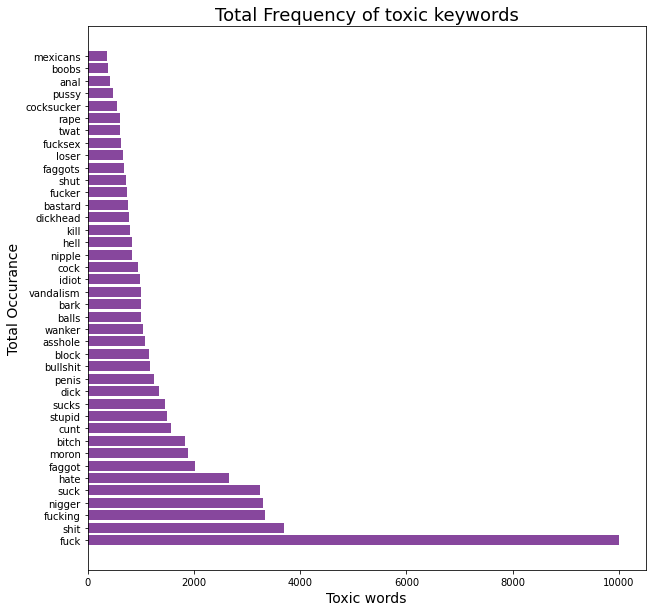

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(toxic_words_df['Toxic_word'],toxic_words_df['Frequency'],color='#87479d')
plt.title('Total Frequency of toxic keywords', fontsize=18)
plt.xlabel('Toxic words',fontsize=14)
plt.ylabel('Total Occurance',fontsize=14)
plt.show()